<a href="https://colab.research.google.com/github/hrytsiukp/DSC/blob/master/LR1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ЛАБОРАТОРНА РОБОТА 1.   ПОПЕРЕДНЯ ОБРОБКА ДАНИХ**

In [ ]:
# Завантаження файлу даних
import pandas as pd
from google.colab import files

uploaded = files.upload() #   Після зчитування потрібно попередній рядок задокументувати

data = pd.read_csv("titanic_train.csv")
# data = pd.read_csv('C:\Python\your_dataset.csv')  # Notebook

Saving titanic_train.csv to titanic_train (1).csv


In [ ]:
# Аналіз структури файла та попередній аналіз даних

print(data.shape)    # Перегляд структури файла
print(data.head(5))  #  перегляд верхніх рядків файла


(891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN    

In [ ]:
# Виявлення та обробка пропущених значень
# Виявлення пропущених значень
missing_values = data.isnull().sum()

# Відображення стовпців із пропущеними значеннями
print ('пропущені значення')
print(missing_values[missing_values > 0])

# Заповнення пропущених значень лише для числових стовпців
numeric_columns = data.select_dtypes(include=['number']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())


пропущені значення
Age         177
Cabin       687
Embarked      2
dtype: int64


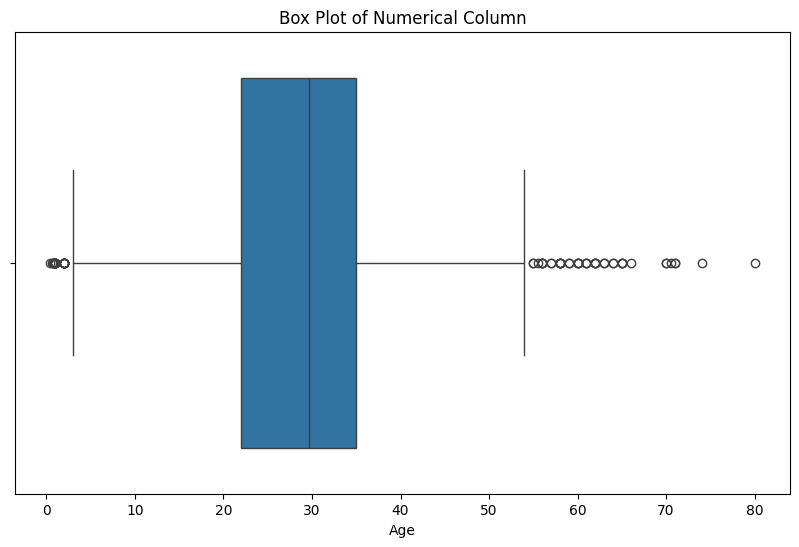

In [ ]:
# Виявлення та лікування викидів
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for outlier detection
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', data=data)
plt.title('Box Plot of Numerical Column')
plt.show()

# Address outliers (e.g., through winsorization)
data['Age'] = data['Age'].clip(lower=data['Age'].quantile(0.05),upper=data['Age'].quantile(0.95))


In [ ]:
# статистичне описання даних
#  загальний формат - 2 знаки після коми
pd.options.display.float_format = '{:,.2f}'.format
print(data.describe())


       PassengerId  Survived  Pclass    Age  SibSp  Parch   Fare
count       891.00    891.00  891.00 891.00 891.00 891.00 891.00
mean        446.00      0.38    2.31  29.49   0.52   0.38  32.20
std         257.35      0.49    0.84  11.72   1.10   0.81  49.69
min           1.00      0.00    1.00   6.00   0.00   0.00   0.00
25%         223.50      0.00    2.00  22.00   0.00   0.00   7.91
50%         446.00      0.00    3.00  29.70   0.00   0.00  14.45
75%         668.50      1.00    3.00  35.00   1.00   0.00  31.00
max         891.00      1.00    3.00  54.00   8.00   6.00 512.33


In [ ]:
# масштабування числових ознак
uploaded = files.upload() # Після зчитування задокументувати
df = "pca80.csv" # для Google Colab
data = pd.read_csv(df)
print(data.head(5))  #  перегляд верхніх рядків

from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Scale numerical columns
data[['P1','P2','P3','P4','P5','P6','P7','P8','P9']] = scaler.fit_transform(data[['P1','P2','P3','P4','P5','P6','P7','P8','P9']])
print(data.head(5))  #  перегляд верхніх рядків


Saving pca80.csv to pca80 (1).csv
      P1    P2     P3     P4     P5     P6     P7    P8   P9
0 126.34 55.55  89.89  25.05 234.39 -12.15 166.23 -0.01 1.50
1 133.99 55.67  96.39  65.18  52.30 -13.19 167.54 -0.02 1.50
2 129.13 56.48  95.81  85.99  85.53 -22.82 180.53 -0.00 3.98
3 131.16 66.11 100.89 124.02 109.57 -24.51 188.23 -0.00 4.06
4 151.08 62.57  99.66  28.41  29.64  -0.62 190.85  0.00 3.85
    P1   P2   P3   P4   P5   P6   P7   P8   P9
0 0.81 0.00 0.00 0.00 0.85 0.40 0.01 0.55 0.00
1 0.87 0.00 0.04 0.12 0.10 0.40 0.02 0.52 0.00
2 0.83 0.01 0.04 0.19 0.24 0.38 0.11 0.57 0.22
3 0.85 0.04 0.08 0.31 0.34 0.37 0.16 0.57 0.22
4 1.00 0.03 0.07 0.01 0.01 0.43 0.18 0.58 0.20


In [ ]:
# Стандартизація чмслових значень
print(data.head(5))  #  перегляд верхніх рядків
from sklearn.preprocessing import StandardScaler
# Initialize the scaler
scaler = StandardScaler()

# Standardize numerical columns
data[['P1','P2','P3','P4','P5','P6','P7','P8','P9']] = scaler.fit_transform(data[['P1','P2','P3','P4','P5','P6','P7','P8','P9']])
print(data.head(5))  #  перегляд верхніх рядків


    P1   P2   P3   P4   P5   P6   P7   P8   P9
0 0.81 0.00 0.00 0.00 0.85 0.40 0.01 0.55 0.00
1 0.87 0.00 0.04 0.12 0.10 0.40 0.02 0.52 0.00
2 0.83 0.01 0.04 0.19 0.24 0.38 0.11 0.57 0.22
3 0.85 0.04 0.08 0.31 0.34 0.37 0.16 0.57 0.22
4 1.00 0.03 0.07 0.01 0.01 0.43 0.18 0.58 0.20
    P1    P2    P3    P4    P5    P6    P7    P8    P9
0 1.77 -1.89 -2.19 -2.33  0.81 -0.07 -2.15 -0.16 -2.37
1 2.04 -1.89 -2.00 -1.83 -2.13 -0.09 -2.11 -0.33 -2.37
2 1.87 -1.88 -2.02 -1.56 -1.59 -0.22 -1.76 -0.02 -1.47
3 1.94 -1.75 -1.88 -1.08 -1.20 -0.24 -1.56 -0.02 -1.44
4 2.63 -1.79 -1.91 -2.29 -2.49  0.08 -1.49  0.10 -1.51
